In [2]:
import cv2
import cv_bridge
import minkindr
import numpy as np
import rosbag
import rospy
import scipy
from dvs_msgs import msg
from dvs_msgs.msg import Event, EventArray
from geometry_msgs.msg import PoseStamped
from sensor_msgs.msg import CameraInfo, Image
from std_msgs.msg import *
import matplotlib.pyplot as plt


In [3]:
bridge = cv_bridge.CvBridge()
config={}
config["bag_path"]="/home/mpl/datasets/night_slow_02.bag"
config["ir_topic"]="/ir/image_raw"
config["rgb_topic"]="/rgb/image_raw"
print(config)

{'bag_path': '/home/mpl/datasets/night_slow_02.bag', 'ir_topic': '/ir/image_raw', 'rgb_topic': '/rgb/image_raw'}


In [4]:
bag = rosbag.Bag(config["bag_path"], "r")
ir_msgs=[m.message for m in bag.read_messages(config["ir_topic"])]
ir_imgs=[bridge.imgmsg_to_cv2(m,m.encoding) for m in ir_msgs]
rgb_msgs=[m.message for m in bag.read_messages(config["rgb_topic"])]
rgb_imgs=[bridge.imgmsg_to_cv2(m,m.encoding) for m in rgb_msgs]


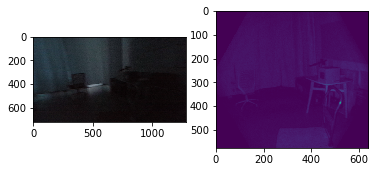

In [5]:
imgs = [rgb_imgs[120],ir_imgs[120]]
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(imgs[i])

0 2086


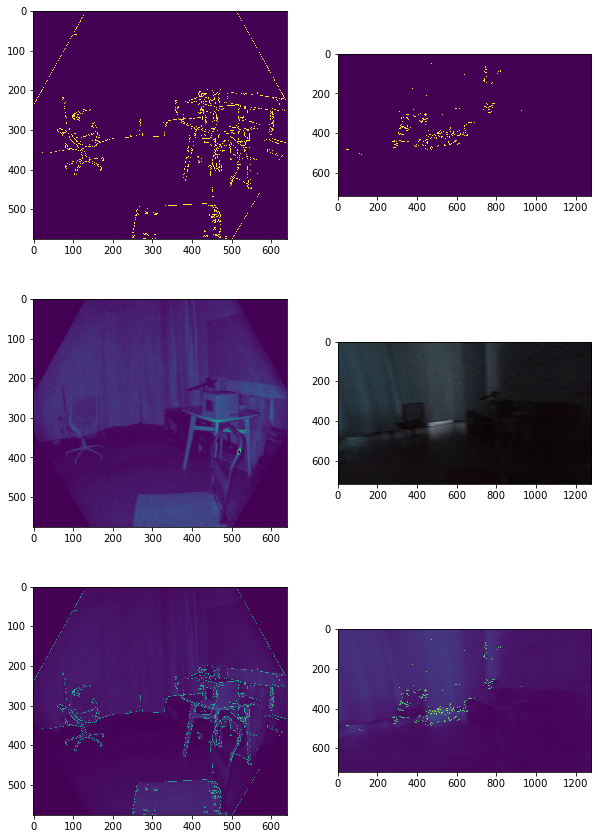

In [9]:
img = ir_imgs[120]
print(img.min(),img.max())
img_temp = img.copy()
img_temp[img>3*256]=0
img_temp//=3
img_temp=img_temp.astype(np.uint8)

canny_ir=cv2.Canny(img_temp,20,80)
canny_rgb=cv2.Canny(rgb_imgs[120],20,80)
comps = [canny_ir,canny_rgb,img_temp,rgb_imgs[120],0.5*canny_ir+0.5*img_temp,0.5*cv2.cvtColor(rgb_imgs[120],cv2.COLOR_RGBA2GRAY)+0.5*canny_rgb]
fig=plt.figure()
fig.set_figwidth(10)
fig.set_figheight(15)

for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(comps[i])
fig.savefig("ir-and-rgb-edges.png")
